In [2]:
import numpy as np 
import pandas as pd 

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data = pd.read_csv("../creditcard.csv")

In [4]:
from sklearn.preprocessing import StandardScaler

data['normAmount'] = StandardScaler().fit_transform(data['Amount'].reshape(-1, 1))

/home/iiitb/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:3: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  app.launch_new_instance()


In [5]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,normAmount
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0.244964
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,-0.342475
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,1.160686
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0.140534
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,-0.073403


In [6]:
data = data.drop(['Time','Amount'],axis=1)

In [7]:
normal_data = data.loc[data["Class"] == 0]
fraud_data = data.loc[data["Class"] == 1]
print("Size of normal_data:", len(normal_data))
print("Size of fraud_data:", len(fraud_data))

Size of normal_data: 284315
Size of fraud_data: 492


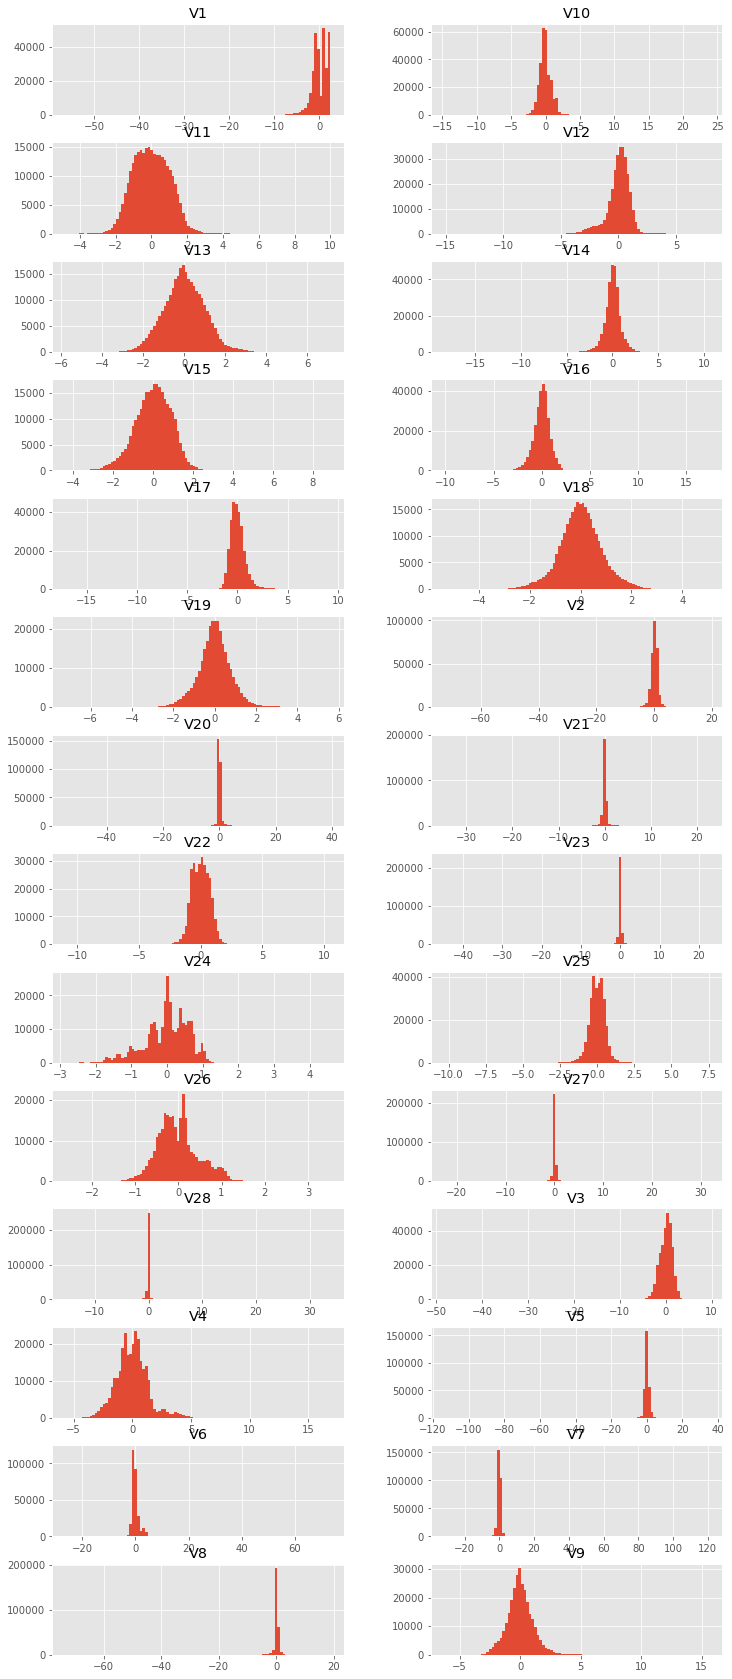

In [8]:
matplotlib.style.use('ggplot')
pca_columns = list(data)[0:-2]
normal_data[pca_columns].hist(stacked=False, bins=100, figsize=(12,30), layout=(14,2));

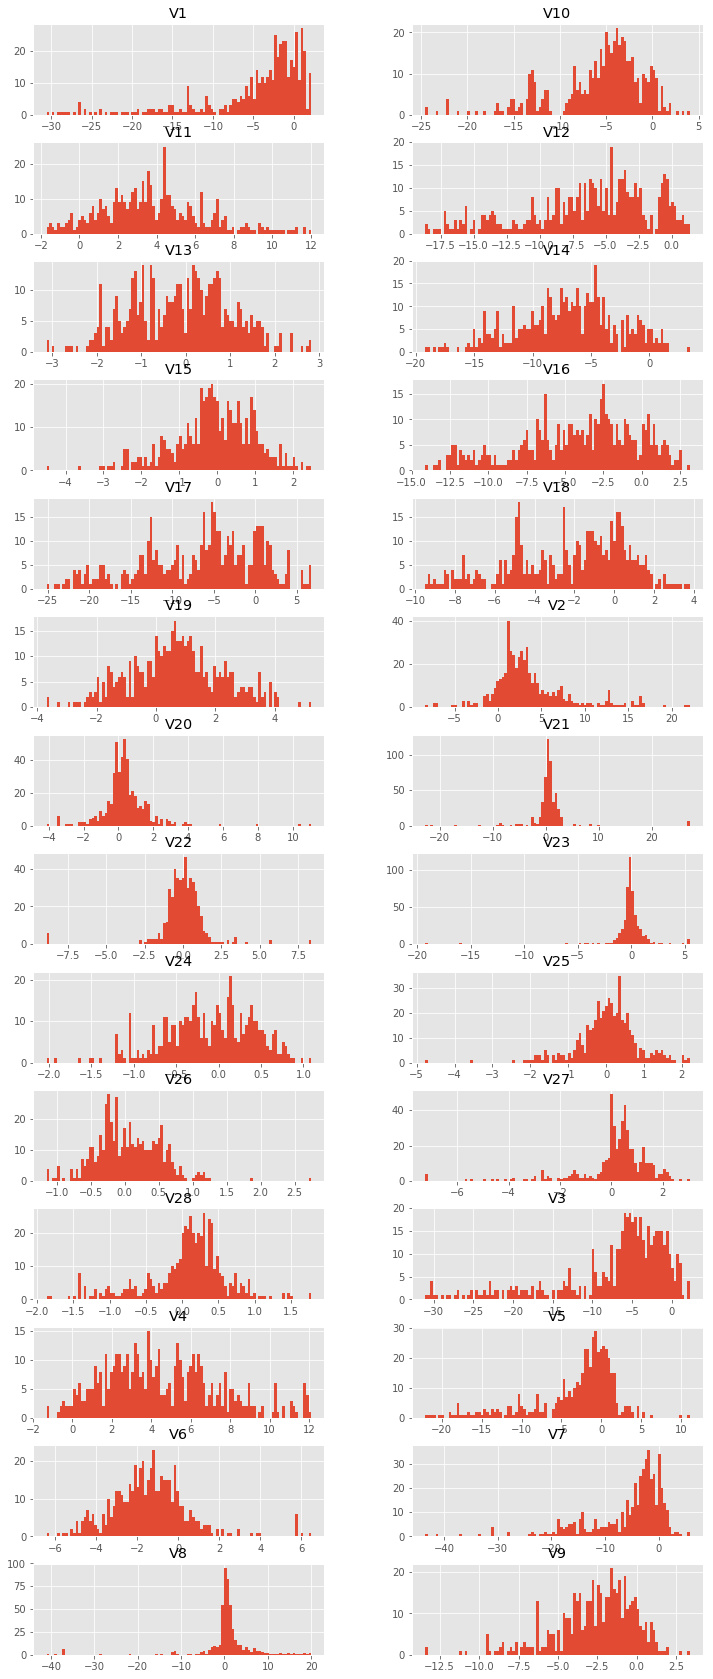

In [9]:
matplotlib.style.use('ggplot')
pca_columns = list(data)[0:-2]
fraud_data[pca_columns].hist(stacked=False, bins=100, figsize=(12,30), layout=(14,2));

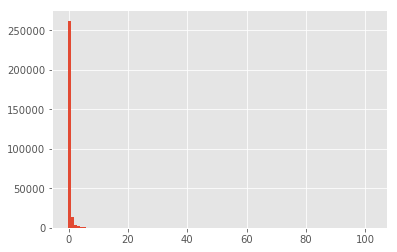

In [10]:
normal_data["normAmount"].loc[normal_data["normAmount"] < 500].hist(bins=100);

In [11]:
print("Mean", normal_data["normAmount"].mean())
print("Median", normal_data["normAmount"].median())

Mean -0.00023427517150611662
Median -0.2652714967001885


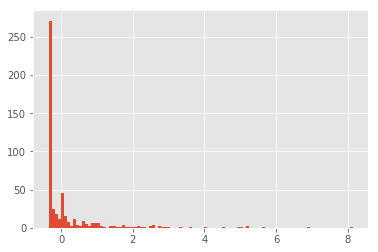

In [12]:
fraud_data["normAmount"].hist(bins=100);

In [13]:
print("Mean Fraudulent", fraud_data["normAmount"].mean())
print("Median Fraudulent", fraud_data["normAmount"].median())

Mean Fraudulent 0.13538200281877721
Median Fraudulent -0.31624709567289744


In [14]:
fraud_data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normAmount
541,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,-2.772272,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,1,-0.353229
623,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,-0.838587,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,1,1.761758
4920,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,-1.525412,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,1,0.606031
6108,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,-4.801637,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,1,-0.117342
6329,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,-2.447469,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1,-0.349231


In [15]:
normal_data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


In [16]:
normal_pca_data = normal_data[pca_columns]
fraud_pca_data = fraud_data[pca_columns]


In [17]:
num_test = 75000
shuffled_data = normal_pca_data.sample(frac=1)[:-num_test].values
X_train = shuffled_data

X_valid = np.concatenate([shuffled_data[-2*num_test:-num_test], fraud_pca_data[:246]])
y_valid = np.concatenate([np.zeros(num_test), np.ones(246)])

X_test = np.concatenate([shuffled_data[-num_test:], fraud_pca_data[246:]])
y_test = np.concatenate([np.zeros(num_test), np.ones(246)])

print("Size of X:",len(X_train),'   ', len(X_valid), '    ', len(X_test))
print("Size of Y:",len(y_valid), '    ', len(y_test))

Size of X: 209315     75246      75246
Size of Y: 75246      75246


In [18]:
X_Legit = data.query("Class==0").drop(["normAmount","Class"],1)
y_Legit = data.query("Class==0")["Class"]

X_Fraud = fraud_data.query("Class==1").drop(["normAmount","Class"],1)
y_Fraud = fraud_data.query("Class==1")["Class"]

print("Size of X_Legit ",len(X_Legit),'  ', "y_Legit: ", len(y_Legit))
print("Size of X_Fraud ",len(X_Fraud),'  ', "y_Fraud: ", len(y_Fraud))

Size of X_Legit  284315    y_Legit:  284315
Size of X_Fraud  492    y_Fraud:  492


In [19]:
def covariance_matrix(X):
    m=len(X)
    mu = X.mean()
    Sigma=0
    for i in range(m):
        Sigma += np.outer(X[i] - mu, X[i] - mu)
    return Sigma / m

In [20]:
cov_mat = covariance_matrix(X_train)
cov_mat_inv = np.linalg.pinv(cov_mat)
cov_mat_det = np.linalg.det(cov_mat)
np.matrix(cov_mat).shape

(28, 28)

In [21]:
def multi_gauss(x):
    n = len(cov_mat)
    return (np.exp(-0.5 * np.dot(x, np.dot(cov_mat_inv, x.T))) 
            / (2. * np.pi)**(n/2.) 
            / np.sqrt(cov_mat_det))

In [22]:
# Check out some resulting probablilities for Fraud examples
#X_Fraud = data.query("Class==1").drop(["Amount","Class","Time"],1)
for i in range(10):
    print(multi_gauss(X_Fraud.iloc[i]))

1.03461901859e-106
5.76960042544e-19
8.24246647654e-113
0.0
1.03056191629e-60
0.0
0.0
1.09489788508e-194
9.11967459231e-194
4.04465957878e-301


In [23]:
from sklearn.model_selection import train_test_split
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_Legit, y_Legit, test_size=0.33, random_state=42)
print(len(X_test_2))
X_test_2 = X_test_2.append(X_Fraud)
print(len(X_Fraud),'   ', len(X_test_2))
y_test_2 = y_test_2.append(y_Fraud)
print (len(X_Legit))
print (len(y_Legit))
#X_test_2.head()
#temp=X_train.head(100)
#print type(X_train)
print(X_train_2)

93824
492     94316
284315
284315
              V1        V2        V3        V4        V5        V6        V7  \
129701 -1.500853  1.701804  0.681542  0.000699 -0.450230 -0.830607  0.222339   
31479   1.136452  0.008456 -0.057826  0.859583 -0.159075  0.139526 -0.393983   
71978  -2.476798  3.140707 -0.058584  2.472449 -1.407176 -0.482340 -1.693187   
146747 -1.240925  1.158965  1.229425 -0.582542 -0.598086  0.420206  0.704466   
26850  -1.794051  1.062495 -0.584911 -4.010684  0.386437 -1.131310  1.048515   
171295  1.744775 -0.619029 -0.543605  1.310009 -0.537685 -0.023638 -0.502631   
163598  1.941068  0.460330 -1.003279  3.439517  0.854575  0.696680  0.037718   
11759  -1.766822  1.666653 -1.250557 -2.168176  1.301435  3.007161 -1.250384   
260881  1.977468 -0.631548 -1.675706 -0.150513  0.301986  0.260689 -0.214645   
52447   1.050714 -0.309944  1.062627  0.484630 -0.961934  0.002248 -0.690525   
201540  0.275779  1.175064 -1.902268 -0.589322  0.803198 -1.314288  0.661827   
279567

In [90]:
from scipy.stats import multivariate_normal
var = multivariate_normal.pdf(X_test_2,X_test_2.mean(), cov_mat)
eps=min(var)
print(eps)

0.0


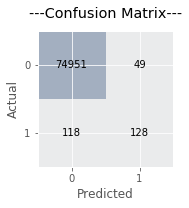

True Positive= 74951 , True Negetive= 128 , False Positive= 118 , False Negetive= 49 

The accuracy is 99.7780612923 %
The recall is 99.9346666667 %
The precision is 99.8428112803 %
The F1 Score is 99.8887178565 %


In [91]:
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
def stats(X_test, y_test, eps):
    predictions = np.array([multi_gauss(x) <= eps for x in X_test], dtype=bool)
    y_test = np.array(y_test, dtype=bool)
    CM=confusion_matrix(y_test, predictions)
    fig, ax = plot_confusion_matrix(conf_mat=CM)
    plt.title("---Confusion Matrix---")
    plt.ylabel("Actual")
    plt.xlabel("Predicted")
    plt.show()
    
    TP=CM[0,0]
    FN=CM[0,1]
    FP=CM[1,0]
    TN=CM[1,1]
    
    print("True Positive=",TP,", True Negetive=",TN,", False Positive=",FP,", False Negetive=",FN,"\n")
    
    accuracy=(TP+TN)/(TP+FP+FN+TN)
    recall=TP/(TP+FN)
    precision=TP/(TP+FP)
    f1=(2*precision*recall)/(precision+recall)
    
    print("The accuracy is "+str(accuracy*100) + " %")
    print("The recall is "+ str(recall*100) +" %")
    print("The precision is "+ str(precision*100) +" %")
    print("The F1 Score is "+ str(f1*100) +" %")

stats(X_valid, y_valid, eps)